# Module 1 Comparison Plots: Pyaez repo v2.2 vs PyAEZv2.2_MOD1parallel

Date: 2024 SEP 9

<u>Data Inputs</u>
- the asia small test data at https://github.com/kerriegeil/PyAEZ/tree/v2.2_MOD1parallel/data_input/asia_small



In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import glob
import numpy as np

In [2]:
ppyresdir=r'C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/' # parallel pyaez results dir for asia small
rpyresdir=r'C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/'         # repo pyaez results dir for asia small

domain='asiasmall'

# tif file names and colorbar info for the various model version and plots
varinfo={'ThermalClimate':{'gaez':'mcl','pyaez':'ThermalClimate','parvec':'ThermalClimate','cmap':'gist_ncar_r','levels':12,'vmin':0,'vmax':12},
          'ThermalZone':{'gaez':'mc2','pyaez':'ThermalZone','parvec':'ThermalZone','cmap':'gist_ncar_r','levels':12,'vmin':0,'vmax':12},
          'LGPt0':{'gaez':'lt1','pyaez':'LGPt0','parvec':'LGPt0','cmap':'viridis','vmin':0,'vmax':366},
          'LGPt5':{'gaez':'lt2','pyaez':'LGPt5','parvec':'LGPt5','cmap':'viridis','vmin':0,'vmax':366},
          'LGPt10':{'gaez':'lt3','pyaez':'LGPt10','parvec':'LGPt10','cmap':'viridis','vmin':0,'vmax':366},
          'Tsum0':{'gaez':'','pyaez':'tsum0','parvec':'tsum0','cmap':'hot_r','vmin':0,'vmax':11000}, #???
          'Tsum5':{'gaez':'ts2','pyaez':'tsum5','parvec':'tsum5','cmap':'hot_r','vmin':0,'vmax':11000},
          'Tsum10':{'gaez':'ts3','pyaez':'tsum10','parvec':'tsum10','cmap':'hot_r','vmin':0,'vmax':11000},
          'LGP':{'gaez':'lgd','pyaez':'LGP','parvec':'LGP','cmap':'viridis','vmin':0,'vmax':366},
          'LGPEquivalent':{'gaez':'eq1','pyaez':'LGPEquivalent','parvec':'LGPEquivalent','cmap':'viridis','vmin':0,'vmax':366},
          'Multicrop-irr':{'gaez':'mci','pyaez':'multicrop_irr','parvec':'multicrop_irr','cmap':'gist_ncar_r','levels':9,'vmin':-.2,'vmax':8.4},
          'Multicrop-rain':{'gaez':'mcr','pyaez':'multicrop_rain','parvec':'multicrop_rain','cmap':'gist_ncar_r','levels':9,'vmin':-.2,'vmax':8.4},
          'FrostIndex':{'gaez':'fst','pyaez':'frost_index','parvec':'frost_index','cmap':'tab20b','levels':11,'vmin':-.05,'vmax':1.05},
          'Permafrost':{'gaez':'pfr','pyaez':'permafrost','parvec':'permafrost','cmap':'tab20b','levels':5,'vmin':-.05,'vmax':4.3},
          'Fallow':{'gaez':'tfr','pyaez':'fallow','parvec':'fallow','cmap':'tab10','levels':7,'vmin':-.5,'vmax':6.3},
          'AEZ':{'gaez':'','pyaez':'aez','parvec':'aez','cmap':'rainbow','levels':59,'vmin':0,'vmax':59}}

## ThermalClimate / ThermalZone

C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_ThermalClimate.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_ThermalClimate.tif


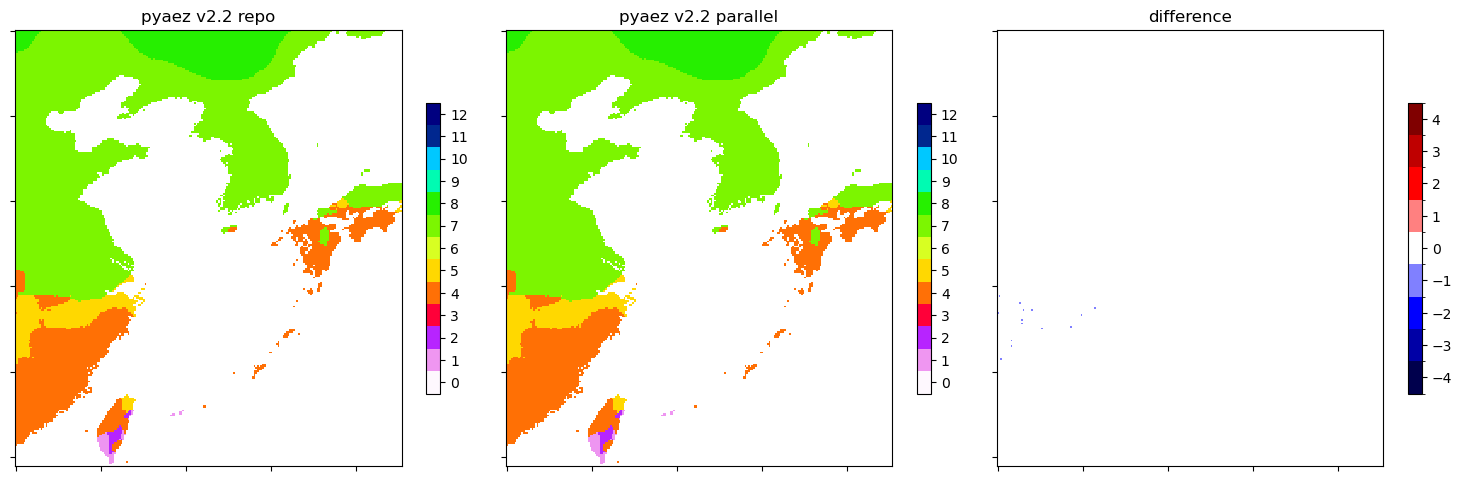

min/max of the repo-parallel difference -1.0 0.0
------------------------------------------------------------


C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_ThermalZone.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_ThermalZone.tif


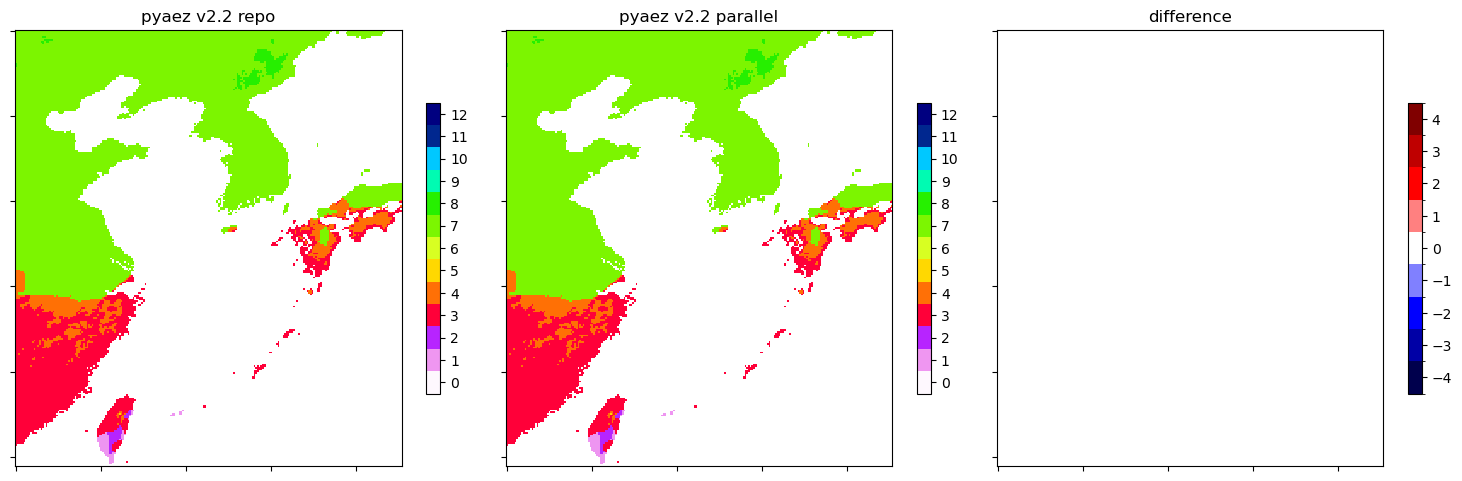

min/max of the repo-parallel difference 0.0 0.0
------------------------------------------------------------




In [3]:
keys=['ThermalClimate','ThermalZone']

for key in keys:
    rpyfile=glob.glob(rpyresdir+domain+'_'+varinfo[key]['pyaez']+'.tif')[0]
    ppyfile=glob.glob(ppyresdir+domain+'_'+varinfo[key]['parvec']+'.tif')[0]

    print(rpyfile)
    print(ppyfile)   
    
    rpydata=xr.open_dataset(rpyfile,engine='rasterio').squeeze()#.isel(y=slice(0,1800))
    ppydata=xr.open_dataset(ppyfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    # colorbar information
    bounds=np.linspace(-0.5,12.5,14)
    ticks=np.linspace(0,12,13).astype('int')
    cmap=plt.get_cmap('gist_ncar_r', 13)
    norm=colors.BoundaryNorm(bounds,cmap.N)  
    
    #-------------------------------------------------------
    
    # plot repo version results
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(rpydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 repo')
    # plt.colorbar(shrink=0.3)
    plt.colorbar(norm=norm,boundaries=bounds,ticks=ticks,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(ppydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(norm=norm,boundaries=bounds,ticks=ticks,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow']:
        cmap=plt.get_cmap('seismic',9).copy()
        bounds=[-4.5,-3.5,-2.5,-1.5,-0.5,.5,1.5,2.5,3.5,4.5]
        ticks=[-4,-3,-2,-1,0,1,2,3,4]    
        extend='neither'    
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(rpydata.band_data.data-ppydata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(rpydata.band_data.data-ppydata.band_data.data),np.nanmax(rpydata.band_data.data-ppydata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')

## LGPt0 / LGPt5 / LGPt10

C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_LGPt0.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_LGPt0.tif


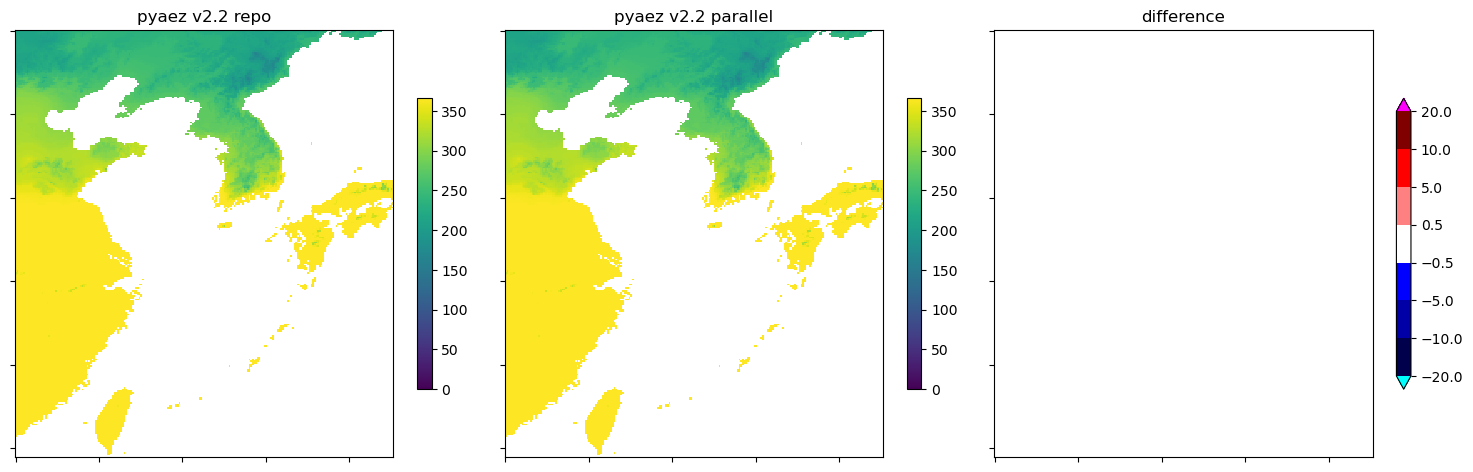

min/max of the repo-parallel difference 0.0 0.0
------------------------------------------------------------


C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_LGPt5.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_LGPt5.tif


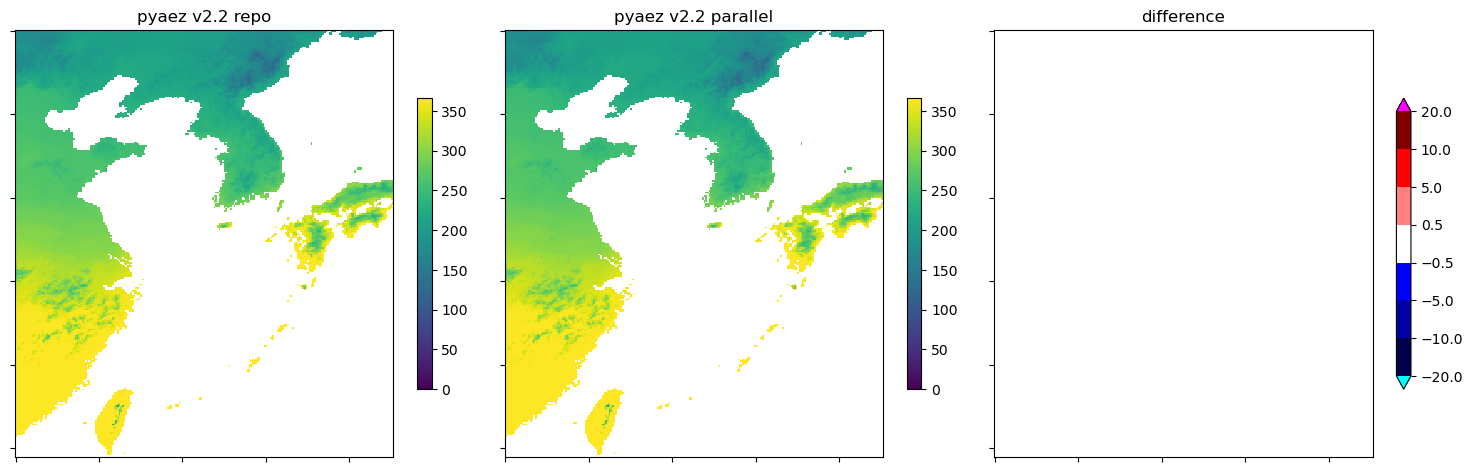

min/max of the repo-parallel difference 0.0 0.0
------------------------------------------------------------


C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_LGPt10.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_LGPt10.tif


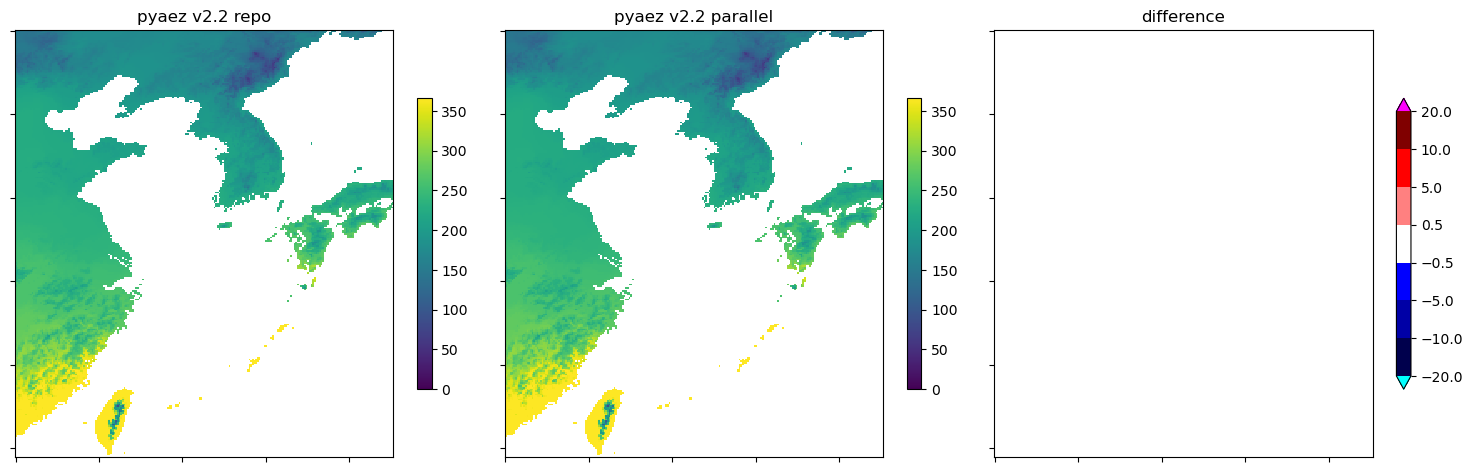

min/max of the repo-parallel difference 0.0 0.0
------------------------------------------------------------




In [4]:
keys=['LGPt0','LGPt5','LGPt10']

for key in keys:

    rpyfile=glob.glob(rpyresdir+domain+'_'+varinfo[key]['pyaez']+'.tif')[0]
    ppyfile=glob.glob(ppyresdir+domain+'_'+varinfo[key]['parvec']+'.tif')[0]

    print(rpyfile)
    print(ppyfile)

    rpydata=xr.open_dataset(rpyfile,engine='rasterio').squeeze()#.isel(y=slice(0,1800))
    ppydata=xr.open_dataset(ppyfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot repo version results
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(rpydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 repo')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(ppydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['LGPt0','LGPt5','LGPt10','LGP','LGPEquivalent']:
        cmap=plt.get_cmap('seismic',9).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-20,-10,-5,-.5,.5,5,10,20]
        ticks=[-20,-10,-5,-.5,.5,5,10,20]
        extend='both'
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(rpydata.band_data.data-ppydata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(rpydata.band_data.data-ppydata.band_data.data),np.nanmax(rpydata.band_data.data-ppydata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')    

## Tsum0 / Tsum5 / Tsum10

C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_tsum0.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_tsum0.tif


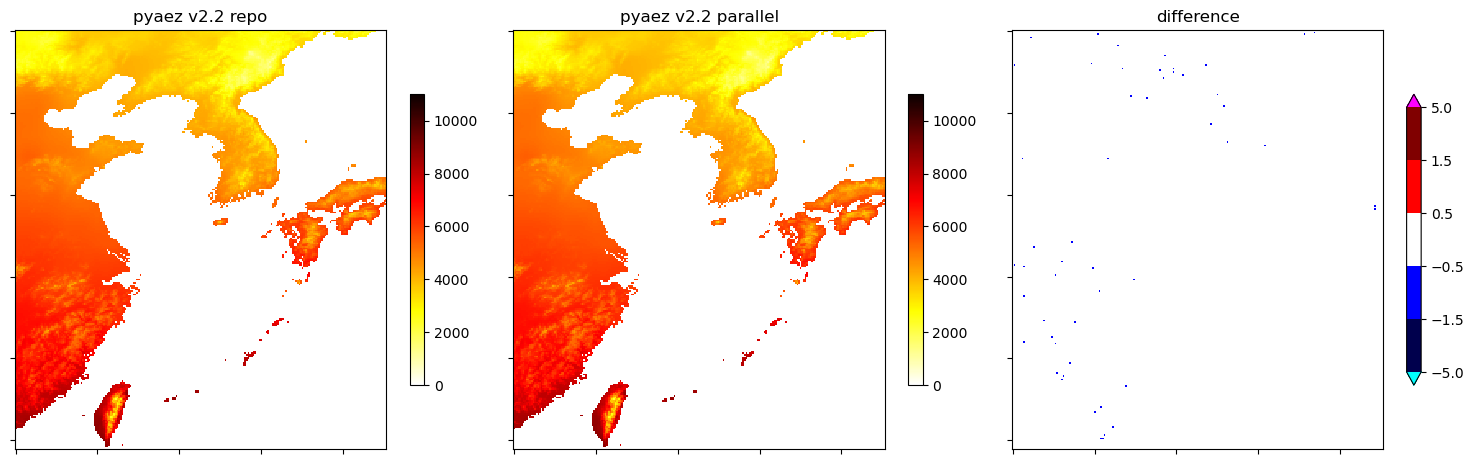

min/max of the repo-parallel difference -1.0 0.0
------------------------------------------------------------


C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_tsum5.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_tsum5.tif


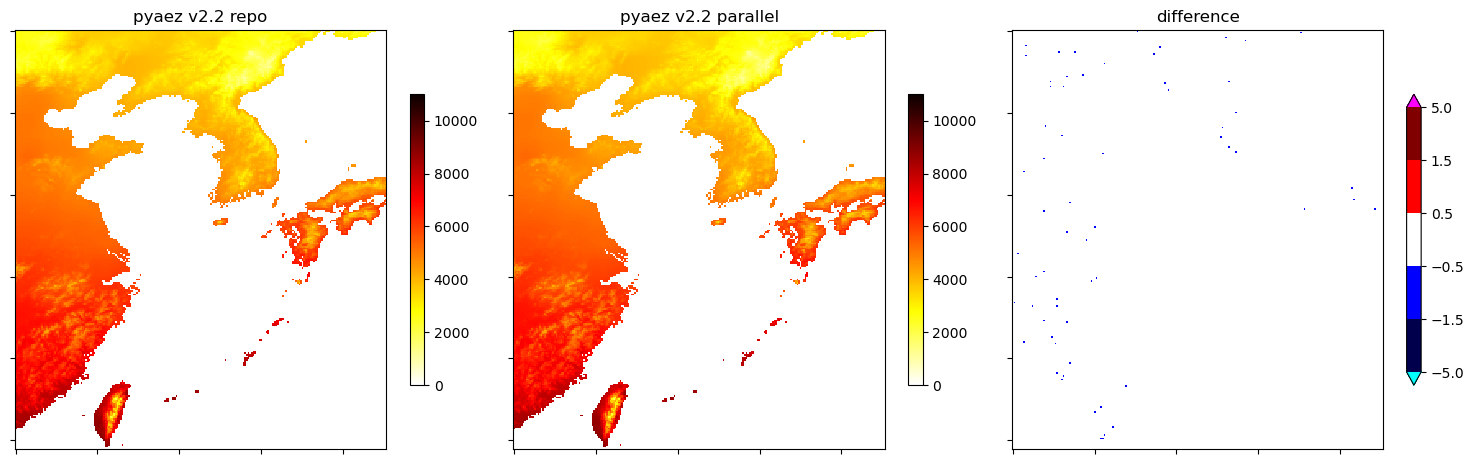

min/max of the repo-parallel difference -1.0 0.0
------------------------------------------------------------


C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_tsum10.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_tsum10.tif


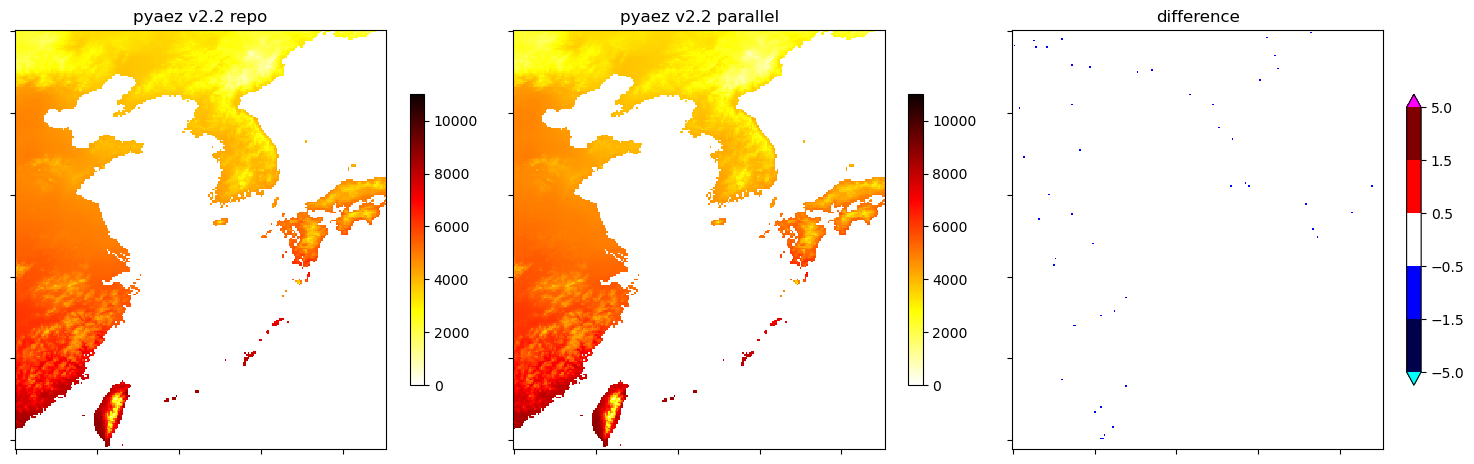

min/max of the repo-parallel difference -1.0 0.0
------------------------------------------------------------




In [5]:
keys=['Tsum0','Tsum5','Tsum10']

for key in keys:

    rpyfile=glob.glob(rpyresdir+domain+'_'+varinfo[key]['pyaez']+'.tif')[0]
    ppyfile=glob.glob(ppyresdir+domain+'_'+varinfo[key]['parvec']+'.tif')[0]

    print(rpyfile)
    print(ppyfile)

    rpydata=xr.open_dataset(rpyfile,engine='rasterio').squeeze()#.isel(y=slice(0,1800))
    ppydata=xr.open_dataset(ppyfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot repo version results
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(rpydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 repo')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(ppydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['Tsum0','Tsum5','Tsum10']:
        cmap=plt.get_cmap('seismic',5).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-5,-1.5,-.5,.5,1.5,5]
        ticks=[-5,-1.5,-.5,.5,1.5,5]
        extend='both'  
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(rpydata.band_data.data-ppydata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(rpydata.band_data.data-ppydata.band_data.data),np.nanmax(rpydata.band_data.data-ppydata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')    

## LGP / LGPEquivalent

C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_LGP.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_LGP.tif


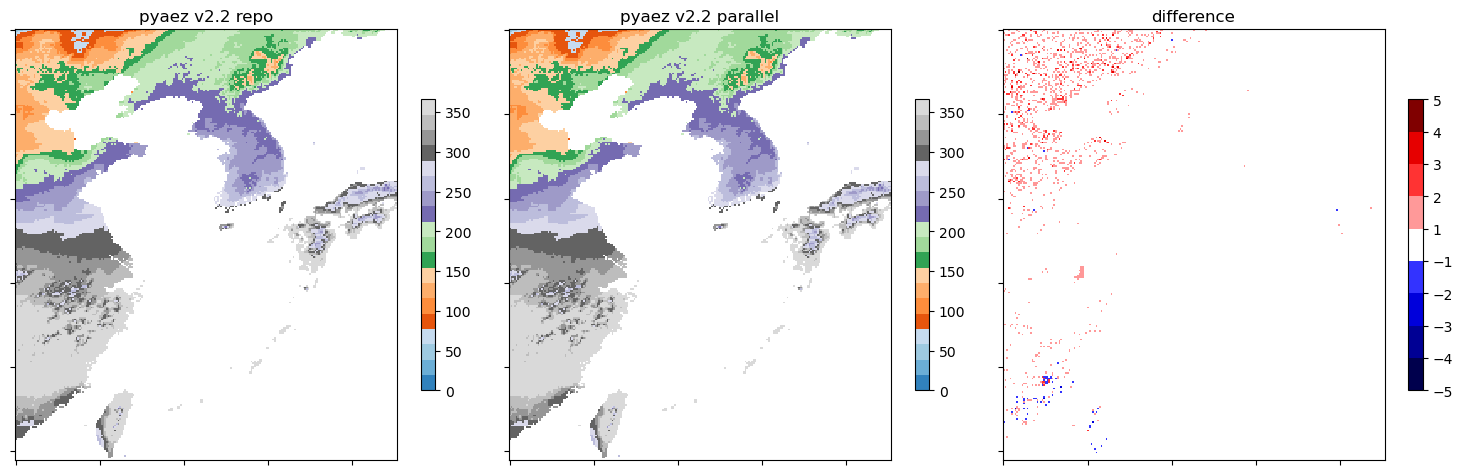

min/max of the repo-parallel difference -3.0 4.0
------------------------------------------------------------


C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_LGPEquivalent.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_LGPEquivalent.tif


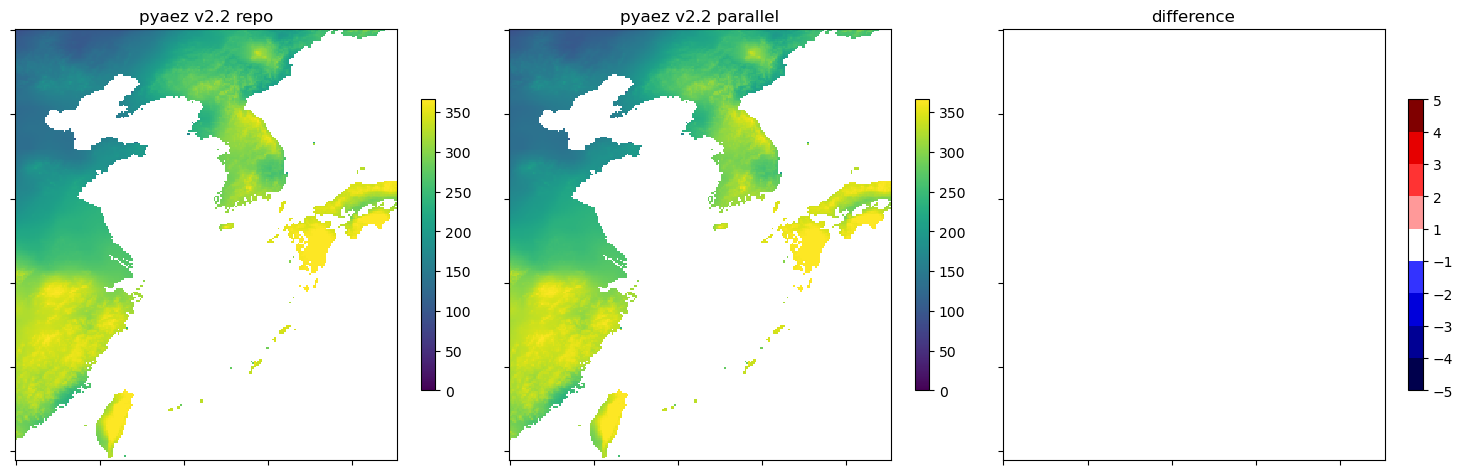

min/max of the repo-parallel difference -0.19900513 0.5993347
------------------------------------------------------------




In [6]:
keys=['LGP','LGPEquivalent']

for key in keys:

    rpyfile=glob.glob(rpyresdir+domain+'_'+varinfo[key]['pyaez']+'.tif')[0]
    ppyfile=glob.glob(ppyresdir+domain+'_'+varinfo[key]['parvec']+'.tif')[0]

    print(rpyfile)
    print(ppyfile)

    rpydata=xr.open_dataset(rpyfile,engine='rasterio').squeeze()#.isel(y=slice(0,1800))
    ppydata=xr.open_dataset(ppyfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    if key == 'LGP':
        cmap=plt.get_cmap('tab20c',19).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]
        ticks=[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]
        extend='max'    

    #-------------------------------------------------------
    # plot repo version results
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(rpydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 repo')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(ppydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['LGPt0','LGPt5','LGPt10','LGP','LGPEquivalent']:
        cmap=plt.get_cmap('seismic',11).copy()
        # cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-5,-4,-3,-2,-1,1,2,3,4,5]
        ticks=[-5,-4,-3,-2,-1,1,2,3,4,5]#[-20,-10,-5,-.5,.5,5,10,20]
        extend='neither'
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(rpydata.band_data.data-ppydata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(rpydata.band_data.data-ppydata.band_data.data),np.nanmax(rpydata.band_data.data-ppydata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')     

## Multicrop-irr / Multicrop-rain

C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_multicrop_irr.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_multicrop_irr.tif


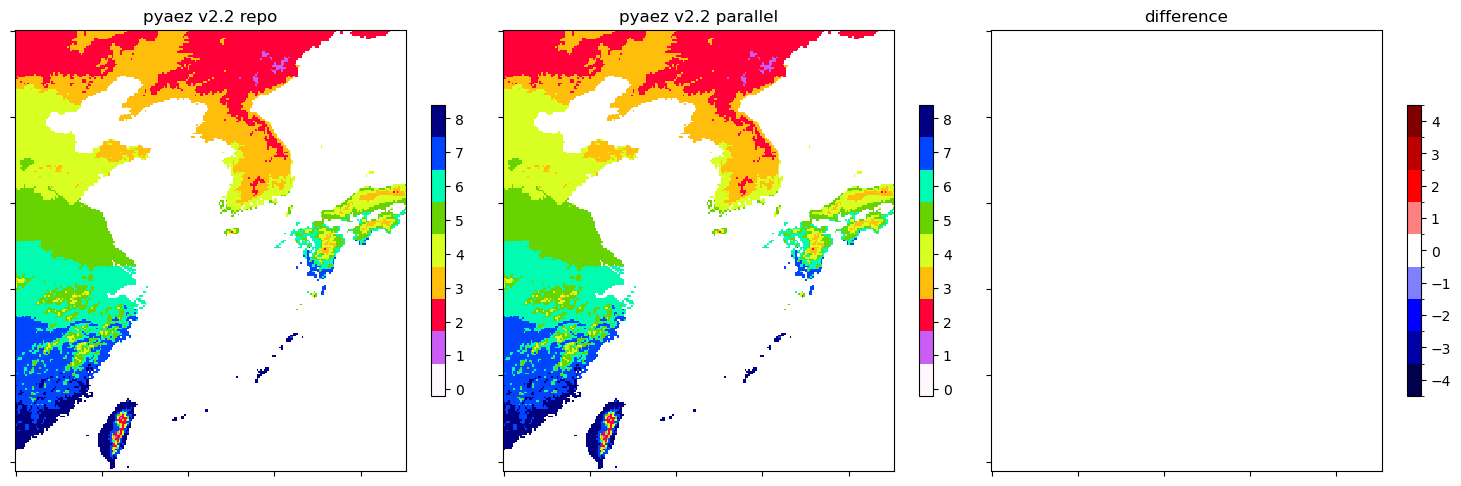

min/max of the repo-parallel difference 0.0 0.0
------------------------------------------------------------


C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_multicrop_rain.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_multicrop_rain.tif


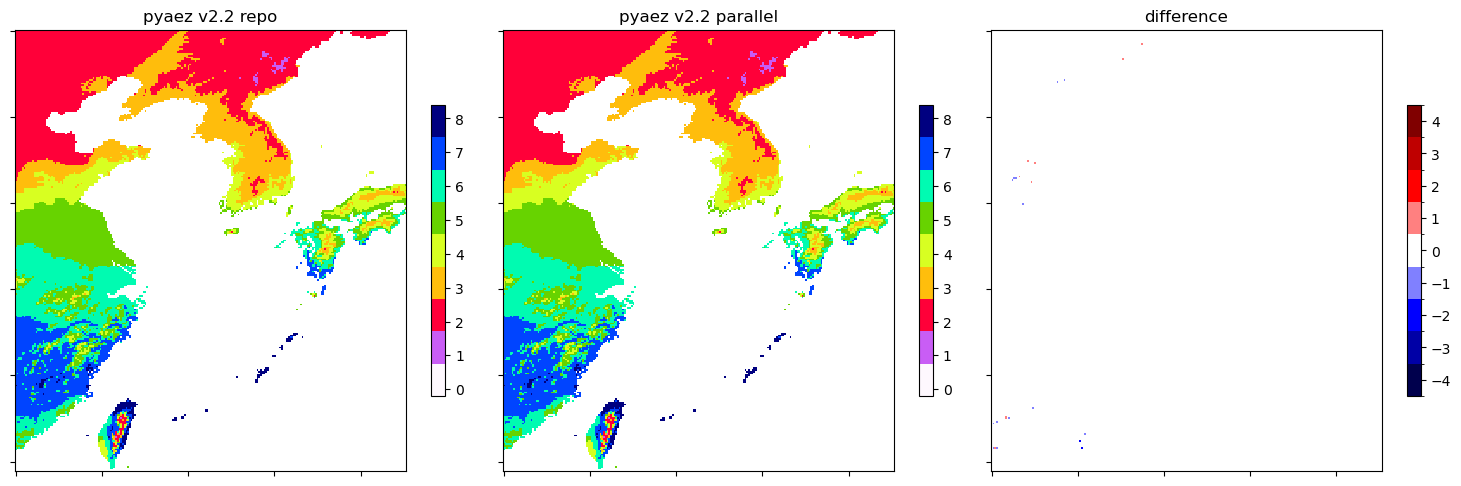

min/max of the repo-parallel difference -2.0 1.0
------------------------------------------------------------




In [7]:
keys=['Multicrop-irr','Multicrop-rain']

for key in keys:

    rpyfile=glob.glob(rpyresdir+domain+'_'+varinfo[key]['pyaez']+'.tif')[0]
    ppyfile=glob.glob(ppyresdir+domain+'_'+varinfo[key]['parvec']+'.tif')[0]

    print(rpyfile)
    print(ppyfile)

    rpydata=xr.open_dataset(rpyfile,engine='rasterio').squeeze()
    ppydata=xr.open_dataset(ppyfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot repo version results
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(rpydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 repo')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(ppydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow']:
        cmap=plt.get_cmap('seismic',9).copy()
        bounds=[-4.5,-3.5,-2.5,-1.5,-0.5,.5,1.5,2.5,3.5,4.5]
        ticks=[-4,-3,-2,-1,0,1,2,3,4]  
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(rpydata.band_data.data-ppydata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(rpydata.band_data.data-ppydata.band_data.data),np.nanmax(rpydata.band_data.data-ppydata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')     

## FrostIndex / Permafrost / Fallow

C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_fallow.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_fallow.tif


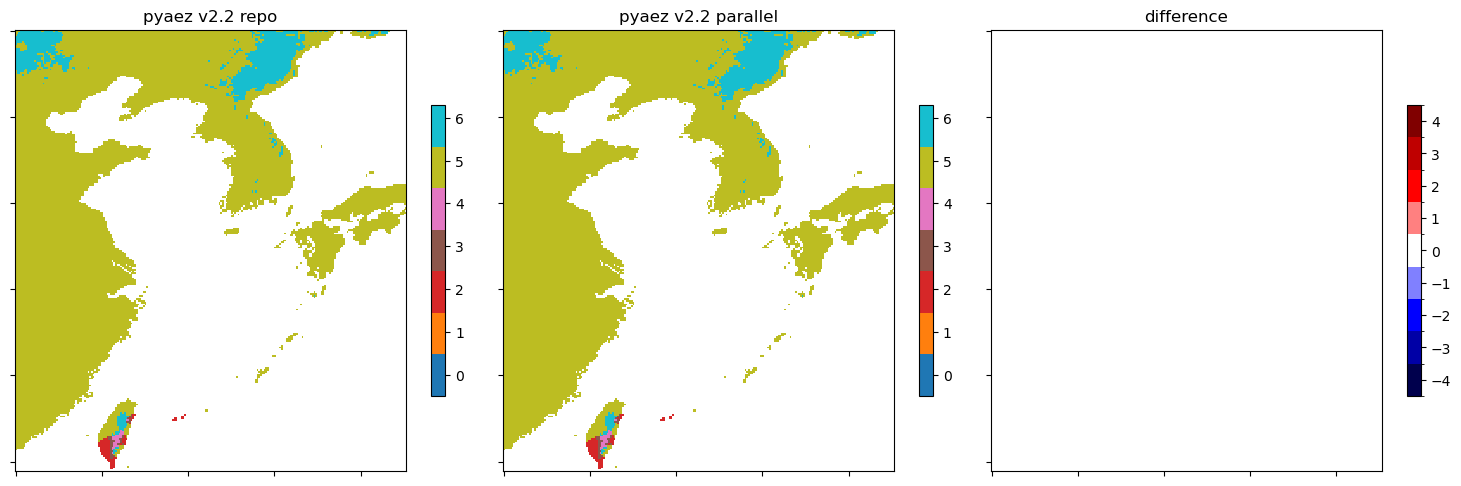

min/max of the repo-parallel difference 0.0 0.0
------------------------------------------------------------




In [8]:
keys=['Fallow']#['FrostIndex','Permafrost','Fallow']

for key in keys:

    rpyfile=glob.glob(rpyresdir+domain+'_'+varinfo[key]['pyaez']+'.tif')[0]
    ppyfile=glob.glob(ppyresdir+domain+'_'+varinfo[key]['parvec']+'.tif')[0]

    print(rpyfile)
    print(ppyfile)

    rpydata=xr.open_dataset(rpyfile,engine='rasterio').squeeze()
    ppydata=xr.open_dataset(ppyfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot repo version results
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(rpydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 repo')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(ppydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow']:
        cmap=plt.get_cmap('seismic',9).copy()
        bounds=[-4.5,-3.5,-2.5,-1.5,-0.5,.5,1.5,2.5,3.5,4.5]
        ticks=[-4,-3,-2,-1,0,1,2,3,4]  
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(rpydata.band_data.data-ppydata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(rpydata.band_data.data-ppydata.band_data.data),np.nanmax(rpydata.band_data.data-ppydata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')     

##  AEZ

C://Users/kerrie/00_code/pyaez_testing/v2.2repo/data_output/NB1/asiasmall_aez.tif
C://Users/kerrie/00_code/pyaez_testing/v2.2_MOD1parallel/data_output/NB1/asiasmall_aez.tif


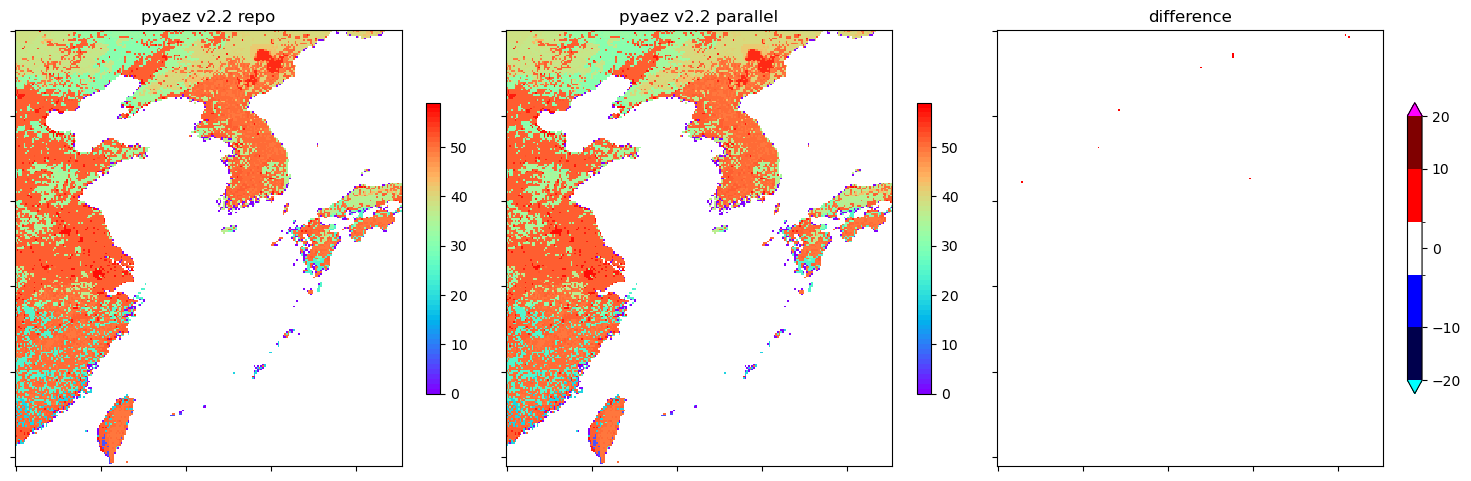

min/max of the repo-parallel difference 0.0 2.0
------------------------------------------------------------




In [9]:
keys=['AEZ']

for key in keys:
    rpyfile=glob.glob(rpyresdir+domain+'_'+varinfo[key]['pyaez']+'.tif')[0]
    ppyfile=glob.glob(ppyresdir+domain+'_'+varinfo[key]['parvec']+'.tif')[0]

    print(rpyfile)
    print(ppyfile)   
    
    rpydata=xr.open_dataset(rpyfile,engine='rasterio').squeeze()#.isel(y=slice(0,1800))
    ppydata=xr.open_dataset(ppyfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot repo version results
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(rpydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 repo')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(ppydata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['AEZ']:
        cmap=plt.get_cmap('seismic',5).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-20,-10,-0.5,0.5,10,20]
        ticks=[-20,-10,0,10,20]
        extend='both' 
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(rpydata.band_data.data-ppydata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.3)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(rpydata.band_data.data-ppydata.band_data.data),np.nanmax(rpydata.band_data.data-ppydata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')     